In [95]:
import numpy as np
from numpy import typing as npt
from numpy import random as rnd
from pyclugen import clugen
import matplotlib.pyplot as plt

In [96]:
def infer(inputs: npt.NDArray, weights: npt.NDArray, thresh: bool=True):
    if len(inputs) < len(weights):
        inputs = np.hstack((1, inputs))
    o = np.sum(inputs * weights)
    if thresh:
        if o > 0:
            o = 1
        elif o < 0:
            o = -1
    return o

In [97]:
def gradient_descent(train_data: npt.NDArray, eta: float, iters: int=1000, seed: int=123) -> npt.NDArray:
    n_weights = train_data.shape[1]
    train_data = np.hstack((np.ones((train_data.shape[0], 1)), train_data))
    rng = rnd.default_rng(seed)
    w = rng.uniform(-1, 1, n_weights)
    for _ in range(iters):
        dw = np.zeros(n_weights)
        for i in range(train_data.shape[0]):
            o = infer(train_data[i, 0:-1], w)
            for iw in range(n_weights):
                dw[iw] += eta * (train_data[i, -1] - o) * train_data[i, iw]
        for iw in range(n_weights):
            w[iw] += dw[iw]
    return w

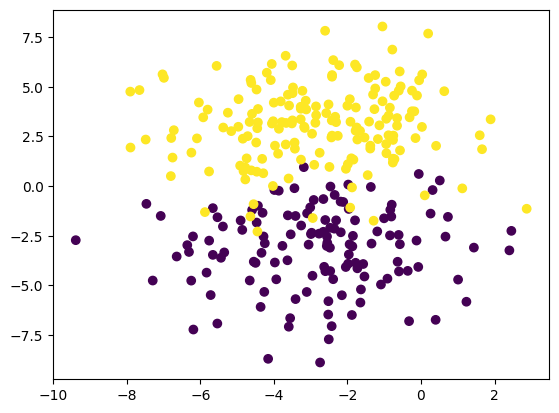

In [98]:
seed = 123

clust = clugen(2, 2, 300, [1, 1], np.pi / 4, [5, 5], 0.1, 0, 2, point_dist_fn="n", rng=rnd.default_rng(seed))

plt.scatter(clust.points[:, 0], clust.points[:, 1], c=clust.clusters)

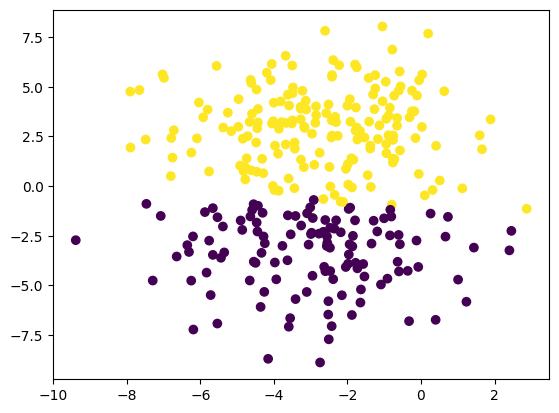

In [99]:
clust.clusters[clust.clusters == 2] = -1
train_data = np.hstack((clust.points, clust.clusters.reshape((-1, 1))))

w = gradient_descent(train_data, 0.1, 100)

new_clusters = np.apply_along_axis(infer, 1, train_data[:, 0:-1], w)

plt.scatter(clust.points[:, 0], clust.points[:, 1], c=new_clusters)

In [100]:
def stochastic_gradient_descent(train_data: npt.NDArray, eta: float, iters: int=1000, seed: int=123) -> npt.NDArray:
    n_weights = train_data.shape[1]
    train_data = np.hstack((np.ones((train_data.shape[0], 1)), train_data))
    rng = rnd.default_rng(seed)
    w = rng.uniform(-1, 1, n_weights)
    for _ in range(iters):
        dw = np.zeros(n_weights)
        for i in range(train_data.shape[0]):
            o = infer(train_data[i, 0:-1], w)
            for iw in range(n_weights):
                w[iw] += eta * (train_data[i, -1] - o) * train_data[i, iw]
    return w

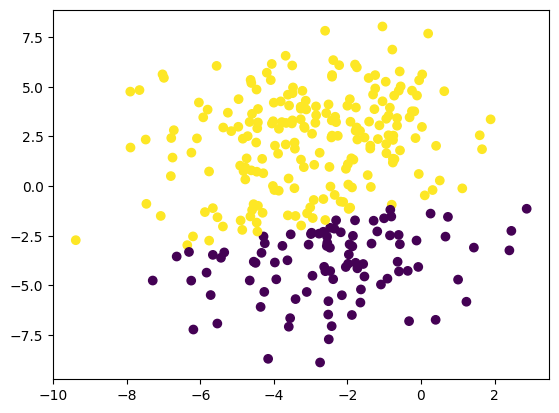

In [107]:
clust.clusters[clust.clusters == 2] = -1
train_data = np.hstack((clust.points, clust.clusters.reshape((-1, 1))))

w = stochastic_gradient_descent(train_data, 0.01, 4000)

new_clusters = np.apply_along_axis(infer, 1, train_data[:, 0:-1], w)

plt.scatter(clust.points[:, 0], clust.points[:, 1], c=new_clusters)